<h1>Exploring Survival on the Titanic</h1>

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people seemed more likely to survive than others, such as women, children, and the upper-class.

More Information: https://en.wikipedia.org/wiki/RMS_Titanic

In this project, we will investigate the dataset and explore who the passengers were and if some were more likely to survive than the others. Some of the questions that this dataset could answer are:

1. How did gender and class affect survival?
2. How did traveling alone vs traveling with spouse/children affect chances of survival? 
3. Were younger children more/less likely to survive than older ones?
4. How did the survival statistics for children traveling with nannies compare to children traveling with their parents?

First let's take a look what this dataset looks like.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#To disable warnings for this particular notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
filename = 'titanic-data.csv'
titanic_dataset = pd.read_csv(filename)
titanic_dataset.head(20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


As we can see, many columns are self explanatory. Here's what the other columns indicate:

Survived: indicates survival (0=No, 1=Yes)<br />
Pclass: indicates ticket class (1=1st, 2=2nd, 3=3rd)<br />
SibSp: indicates no. of siblings/spouse onboard <br />
Parch: indicates no. of parents/children on board <br />
Ticket: Ticket Number <br />
Cabin: Cabin Number <br />
Embarked: Port of Embarkation (S=Southampton, C= Cherbourg, Q=Queenstown) <br />

Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


<h2>Data Wrangling</h2>

Before we analyse this dataset, we need to clean up the data. Some data values are observed to be missing in this sample itself and are indicated by NaN. Let's check which are.

In [4]:
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Cabin column seems to have too many missing values to provide useful information during analysis. Also since for this particular analysis it won't be used to answer any posed questions, we can safely delete it.<br />
The Embarked and Ticket columns will not be used in any of our analysis so those can be removed too. 

In [5]:
titanic_data = titanic_dataset.drop(['Cabin','Embarked', 'Ticket'], axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


The Age column has 177 missing values. Its a large portion of the dataset (almost 20%) and if dropped, we will lose data in other columns. Also the missing values in Age column will not affect any computations or plotting of graphs, as these are ignored in python.

But they may affect counts in the dataset, and we may need to account for missing values everytime. So we will remove the missing values from Age column and create a new dataset titanic_df_ages, which will be used for age related calculations. For all other analysis we will use the original titanic_data dataset.

In [6]:
titanic_df_ages = titanic_data.dropna(subset = ['Age'])
titanic_df_ages['PassengerId'].count()
# Total 891 - Missing 177 = 714 values

714

<h2>Exploring the Data</h2>

Now that we have a reasonably clean dataset, let us find out some basic stats from it. To start with, as we will be dealing with a lot of survival stats, let's first find out what the survival rate is for this dataset.

In [7]:
#Function to compute survival rate
def survival_stats(data):
    survived = data.groupby('Survived').get_group(1)['PassengerId'].count()
    total = data['PassengerId'].count()
    print ("Total Passengers: {}".format(total))
    print ("Surviving Passengers: {}".format(survived))
    print ("Percentage of passengers who survived: {:.2f}%".format(survived*100.00/total))


In [8]:
survival_stats(titanic_data)

Total Passengers: 891
Surviving Passengers: 342
Percentage of passengers who survived: 38.38%


<h4>Based on this dataset, <b>38.38%</b> of the passengers survived, which means only <b>2</b> out of every <b>5</b> passengers survived.</h4> <br />
Let's now look at the Age column and get some general statistics.

In [9]:
titanic_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Mean Age of the passengers aboard the ship: <b>29.69 </b> years. <br />
Median Age of the passengers aboard the ship: <b>28 </b> years. <br />
Youngest Passenger: <b>< 1</b> year old <br />
Oldest Passenger: <b>80 </b> years <br />
Standard Deviation: <b>14.52</b> <br />
Let's now plot a histogram of the distribution of the ages.


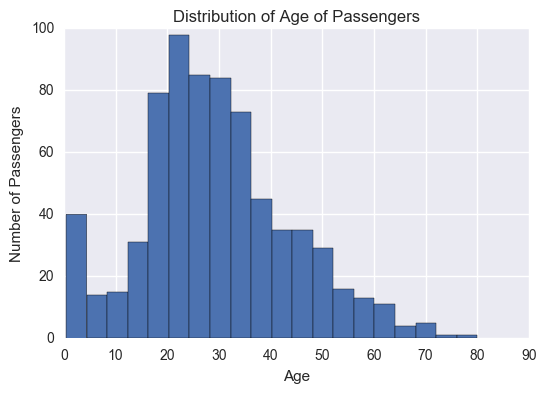

In [10]:
fig = plt.figure()
ax = fig.add_subplot(titanic_data['Age'].hist(bins=20))
ax.set_title("Distribution of Age of Passengers")
ax.set_xlabel('Age')
ax.set_ylabel('Number of Passengers')

We'll now explore the other statistics from the dataset to find out if some groups of passengers were more likely to survive than others and how much.

<h3>How did gender and class affect survival?</h3>

In [11]:
%matplotlib inline
passengers_by_class = titanic_data.groupby('Pclass')['PassengerId'].count()
print('Total number of passengers by class')
print (passengers_by_class)
survivors_by_class = titanic_data.groupby('Pclass')['Survived'].sum()
print('Total number of survivors by class')
print survivors_by_class
print ("Percentage of passengers who survived: {}".format(survivors_by_class*100.00/passengers_by_class))

Total number of passengers by class
Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64
Total number of survivors by class
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Percentage of passengers who survived: Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64


Below is a factorplot showing the proportions

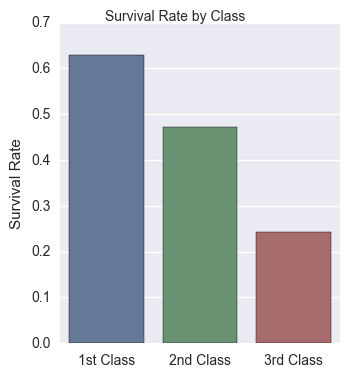

In [12]:
s = sns.factorplot(x="Pclass", y="Survived",
                   data=titanic_data, saturation=.5,
                    kind="bar", ci=None, aspect=.9)
(s.set_axis_labels("", "Survival Rate")
                    .set_xticklabels(["1st Class", "2nd Class","3rd Class"]))
sns.plt.suptitle('Survival Rate by Class')      

A significantly large percentage of passengers survived from the first class, followed by second class and then third.
It looks like the first class passengers had priority access to the lifeboats. <h4>Based on this data, a passenger traveling in first class was almost <b>2.7 times</b> more likely to survive than a passenger traveling in third class. <br /></h4>
The socioeconomic status/class considerably affected the chances of survival.

Now let's take a look at what role gender played in the likelihood of survival.

In [13]:
#Function to compute survival rate by gender
def statistics_by_gender(sex):
    titanic_df_gender = titanic_data.groupby(['Sex']).get_group((sex))
    survival_stats(titanic_df_gender)
    

In [14]:
print("Statistics for Male Passengers") 
statistics_by_gender('male')

Statistics for Male Passengers
Total Passengers: 577
Surviving Passengers: 109
Percentage of passengers who survived: 18.89%


In [15]:
print("Statistics for Female Passengers") 
statistics_by_gender('female')

Statistics for Female Passengers
Total Passengers: 314
Surviving Passengers: 233
Percentage of passengers who survived: 74.20%


Women had a far greater chance of survival than men.<h4>A man traveling aboard the Titanic had only a <b>18.89%</b> chance of survival. In comparison a woman traveling aboard the Titanic had a <b>74.20%</b> chance of survival. Women were almost <b>4x</b> more likely to survive than men. </h4>

This could be because of the 'women and children first' rule that was followed in those days.

Now these statistics for male and female passengers are for all ages, meaning they also include data for children. Let us consider a child to be a passenger less than 18 years of age for exploration purposes and look at the data for children in more detail. 


Note: We will use the dataset titanic_df_ages, where missing values in Age Column have been removed, for analysing Age related data.

In [16]:
print ("Survival percentage for children")
titanic_child_df = titanic_df_ages[titanic_df_ages['Age'] < 18]
survival_stats(titanic_child_df)

Survival percentage for children
Total Passengers: 113
Surviving Passengers: 61
Percentage of passengers who survived: 53.98%


<h4>There were 113 children aboard the Titanic, out of which <b>53.98%</b> survived. </h4>

How likely were infants to survive? Let's consider children < 1 year of age as infants.

In [17]:
under_age_one_df = titanic_df_ages[titanic_df_ages['Age'] < 1]
survival_stats(under_age_one_df)


Total Passengers: 7
Surviving Passengers: 7
Percentage of passengers who survived: 100.00%


<h4>Miraculously, <b>all</b> of the infants in this dataset survived. </h4>

That seems like an interesting observation. Does this trend continue? 

<h3>Were younger children more/less likely to survive than older ones?</h3>

Let's visualize this data in form of a histogram.

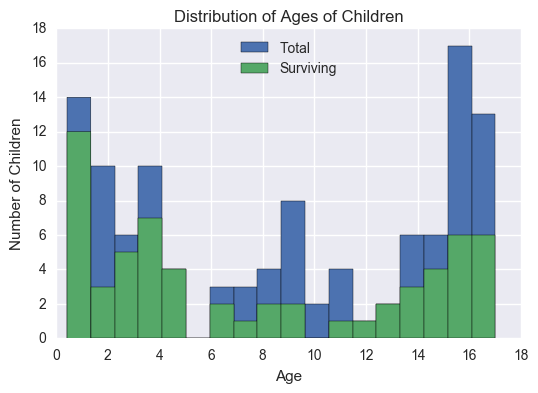

In [18]:
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(titanic_df_ages[titanic_df_ages['Age'] < 18]['Age'].hist(bins=18))
titanic_df_ages[titanic_df_ages['Survived'] == 1][titanic_df_ages['Age'] < 18]['Age'].hist(bins=18)
ax.set_title("Distribution of Ages of Children")
ax.set_xlabel('Age')
ax.set_ylabel('Number of Children')
plt.legend(["Total","Surviving"],loc="upper center")

<h4>From the histogram above, there isn't a clear trend for survival for children based on age.</h4>

But there does seem a noticeable decrease in chances of survival for 16 and 17 year olds. One reason could be the cut off age of 18 is arbitary and may not apply in those days. A 16 year old may have qualified as an adult. Or if that is not the case, he may probably look like a grown adult and could have been prohibited from boarding.

Now let's see how the survival rate varies based on the gender and class together. That is, for each class how was the survival rate for male and female passengers.

In [19]:
#Function to compute survival rate by gender and travel class
def statistics_by_gender_and_class(sex,Pclass):
    print (sex + "s in class " + str(Pclass))
    titanic_data_by_class_and_gender = titanic_data.groupby(['Sex','Pclass']).get_group((sex,Pclass))
    survival_stats(titanic_data_by_class_and_gender)

In [20]:
print("Statistics for Passengers by Gender and Class") 
print ("\n")
statistics_by_gender_and_class('male',1)
print ("---------------------------------------------------------------------------------------------------------------------")
statistics_by_gender_and_class('male',2)
print ("---------------------------------------------------------------------------------------------------------------------")
statistics_by_gender_and_class('male',3)
print ("---------------------------------------------------------------------------------------------------------------------")
statistics_by_gender_and_class('female',1)
print ("---------------------------------------------------------------------------------------------------------------------")
statistics_by_gender_and_class('female',2)
print ("---------------------------------------------------------------------------------------------------------------------")
statistics_by_gender_and_class('female',3)

Statistics for Passengers by Gender and Class


males in class 1
Total Passengers: 122
Surviving Passengers: 45
Percentage of passengers who survived: 36.89%
---------------------------------------------------------------------------------------------------------------------
males in class 2
Total Passengers: 108
Surviving Passengers: 17
Percentage of passengers who survived: 15.74%
---------------------------------------------------------------------------------------------------------------------
males in class 3
Total Passengers: 347
Surviving Passengers: 47
Percentage of passengers who survived: 13.54%
---------------------------------------------------------------------------------------------------------------------
females in class 1
Total Passengers: 94
Surviving Passengers: 91
Percentage of passengers who survived: 96.81%
---------------------------------------------------------------------------------------------------------------------
females in class 2
Total Passengers: 76

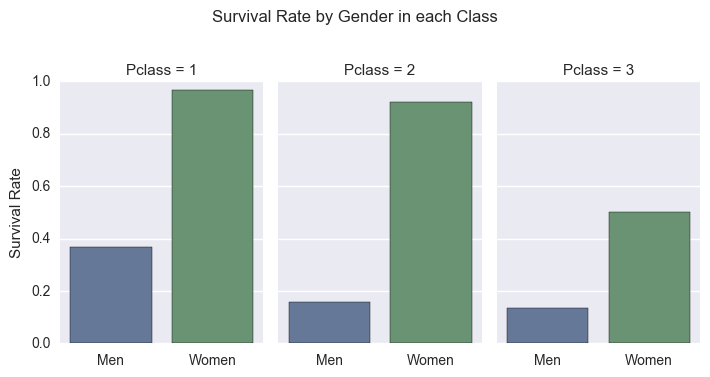

In [21]:
s = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                   data=titanic_data, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(s.set_axis_labels("", "Survival Rate")
                    .set_xticklabels(["Men", "Women"]))
s.fig.suptitle("Survival Rate by Gender in each Class", size=12)
s.fig.subplots_adjust(top=.8)   

It's interesting to see from the above analysis, that almost all of the women (<b>96.81%</b>) from first class survived. The rate looked good even for women in second class (<b>92.11%</b>), but it isn't so encouraging for anybody else. In fact the rate for men traveling in second and third class is comparable (<b>15.74%</b> and <b>13.54%</b> respectively). However, in general for both men and women, traveling in upper class seems to lead to better chances of survival.

Let's take a look now at how other factors may have affected survival. 

<h3>How did traveling alone vs traveling with spouse/children affect chances of survival? </h3>

We have information about whether a passenger was traveling alone or in a group, based on the SibSp and Parch column values. For someone traveling by himself, both the SibSp and Parch values will be 0. For someone traveling with a spouse/sibling SibSp is 1 and for someone traveling with children, Parch is 1. Based on this information let's compute the survival rate. We will consider only adults (age > 18) for this analysis.

Note: Again, we will use the dataset titanic_df_ages, where missing values in Age Column have been removed, for analysing Age related data.

In [22]:
print ("Chances of survival of adults traveling with someone")
adults_with_children = titanic_df_ages[titanic_df_ages['Age'] >= 18][titanic_df_ages['Parch'] > 0]
adults_with_adults = titanic_df_ages[titanic_df_ages['Age'] >= 18][titanic_df_ages['SibSp'] > 0]
adults_not_traveling_alone = pd.concat([adults_with_children,adults_with_adults],join='outer').drop_duplicates()
survival_stats(adults_not_traveling_alone)

Chances of survival of adults traveling with someone
Total Passengers: 220
Surviving Passengers: 109
Percentage of passengers who survived: 49.55%


In [23]:
print ("Chances of survival of adults traveling alone")
adults_traveling_alone = titanic_df_ages[titanic_df_ages['Age'] >= 18][titanic_df_ages['Parch'] == 0][titanic_df_ages['SibSp'] == 0]
#If the above code gives warning Boolean Series key will be reindexed to match DataFrame index, breaking down the dataframes 
#df1 = titanic_df[titanic_df['Age'] >= 18]
#df2 = df1[df1['Parch'] == 0]
#adults_traveling_alone =df2[df2['SibSp'] == 0]
survival_stats(adults_traveling_alone)

Chances of survival of adults traveling alone
Total Passengers: 381
Surviving Passengers: 120
Percentage of passengers who survived: 31.50%


<h4>The chances of survival for an adult traveling alone were lesser <b>(31.50%)</b> than chances of survival for an adult traveling in a family <b>(49.55%)</b>. </h4>

We can speculate that this must be the case because children were given a higher priority to get to the lifeboats. So could it be likely that an adult man traveling alone with a child also got access to the lifeboats and that increased his chances of survival?

But it's not possible to examine this data separately, as Parch contains both data for parents and children. Consider the data below which contains only males traveling alone having Parch > 0. From this sample, a 28 year old could be traveling with either his mother or daughter. That information cannot be obtained from this dataset.

In [24]:
titanic_df_ages[titanic_df_ages['Age'] < 18].count()
#titanic_df['Age'].isnull().sum()
titanic_df_ages[titanic_df_ages['Age'] >= 18][titanic_df_ages['Sex'] == 'male'][titanic_df_ages['Parch'] >= 1][titanic_df_ages['SibSp']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,61.9792
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,63.3583
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,77.2875
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,247.5208
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,77.2875
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,26.0000
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,14.5000
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,61.3792
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,16.1000
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,8.4042


Let's explore now another group of passengers in this data. The data says that children with Parch = 0 were traveling with nannies.

<h3>How did the survival statistics for children traveling with nannies compare to children traveling with their parents?</h3>

In [25]:
children_with_nannies =  titanic_df_ages[titanic_df_ages['Age'] < 18][titanic_df_ages['Parch'] == 0]
print ("Children traveling with nannies")
survival_stats(children_with_nannies)
print ("----------------------------------------------------------------")
print ("Children traveling with parents")
children_with_parents =  titanic_df_ages[titanic_df_ages['Age'] < 18][titanic_df_ages['Parch'] >= 1]
survival_stats(children_with_parents)

Children traveling with nannies
Total Passengers: 32
Surviving Passengers: 16
Percentage of passengers who survived: 50.00%
----------------------------------------------------------------
Children traveling with parents
Total Passengers: 81
Surviving Passengers: 45
Percentage of passengers who survived: 55.56%


<h4>The rate of survival for children with nannies (<b>50%</b>) is only slightly lower those with parents (<b>55.56%</b>). </h4>

<h2>Conclusion</h2>

Exploring the Titanic Dataset provides some interesting insights into who the passengers were and how their chances of survival were affected by various factors. The findings of this data analysis though tentative could be summarized as follows:

1. Out of the total 891 passengers in this dataset, 342 survived which is 38.38%.
2. The mean age of passengers aboard the ship was 29.69 years.
3. The youngest passenger was an infant < 1 year old while the oldest passenger was 80 years old.
4. Gender considerably affected a person's chance of survival. Women were 4 times more likely than men to survive. 
5. Passengers in first class had the greatest chance of survival followed in by second and then third class. Passengers in first class were 2.7 times more likely to survive than passengers in third class.
5. Passengers traveling with family had a greater chance of survival than those traveling alone.
7. Younger children were not more or less likely than older children to survive. There was no particular trend observed.
8. No significant difference was observed in the chance of survival for children traveling with parents vs children traveling with nannies. But overall, children had a survival rate of 53.98%.


There are however a few limitations of this dataset:

1. 177 Age values were missing and were not considered in the analysis. That may have skewed the calculations.
2. The information in the Parch column refers to both parents and children combined. If this data was separately available it may have been possible to analyse how survival rate of men and women was affected when they were traveling with their children.
3. Most information from the Cabin column is missing, to draw any useful insights about how cabin location may have impacted survival.
4. A child is assumed to be someone > 18 years of age. The definition of a child may have been different in those days. If a child is considered of Age < 14 for example, it may change some of the conclusions we have drawn.


References:<br />
https://www.kaggle.com/c/titanic/data<br />
https://seaborn.pydata.org/generated/seaborn.factorplot.html<br />
http://matplotlib.org/users/legend_guide.html<br />
https://plot.ly/matplotlib/axes/<br />
https://stackoverflow.com/questions/42528921/how-to-make-the-sns-countplot-larger